# Download Required Packages

In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [145]:
data = np.genfromtxt('./CollectedData.tsv', delimiter='\t')
data = np.delete(data, 0, 0)
stringData = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype=str)
stringData = np.delete(stringData, 0, 0)

x_index = 19
y_index = 15

temp_data = data
data = []
addresses = []
for d, str_d in zip(temp_data, stringData):
    if d[x_index] > 0 and d[y_index] > 0:
        data.append(d)
        addresses.append(str_d[0])
data = np.array(data)

# Plot Sqft Area vs Price

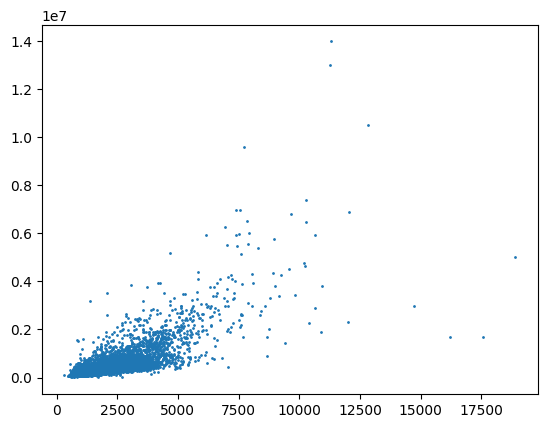

In [146]:
plt.scatter(data[:, x_index], data[:, y_index], s=1)

# Run 2D Gradient Descent Algo

[0/5]: x0 = 0.015290167166205616 x1=234.18850794912316


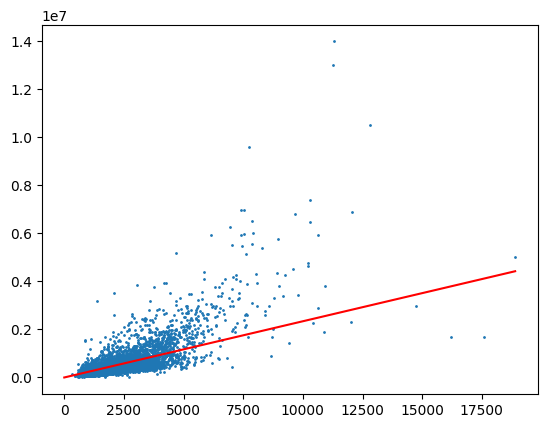

[1/5]: x0 = -0.049328198033705216 x1=235.01138590821316


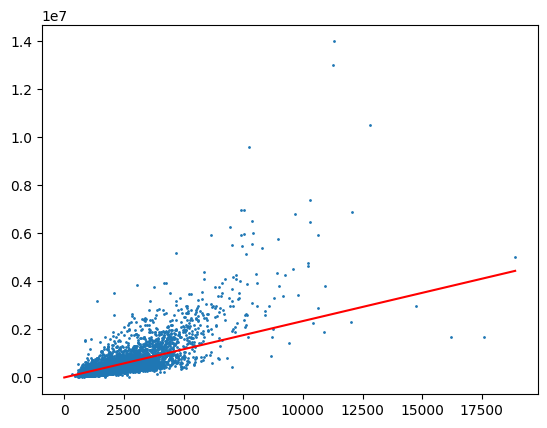

[2/5]: x0 = -0.11422732037187053 x1=235.01430124761717


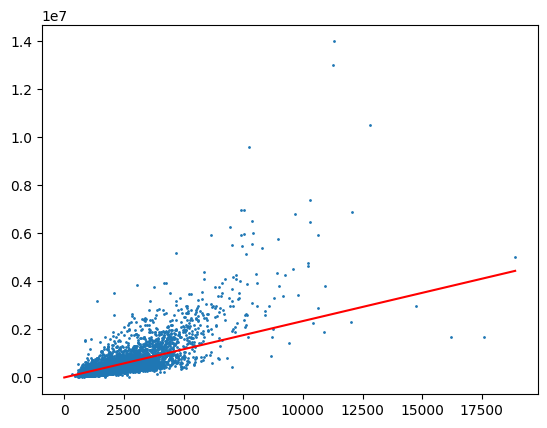

[3/5]: x0 = -0.17912741657781786 x1=235.01433553423462


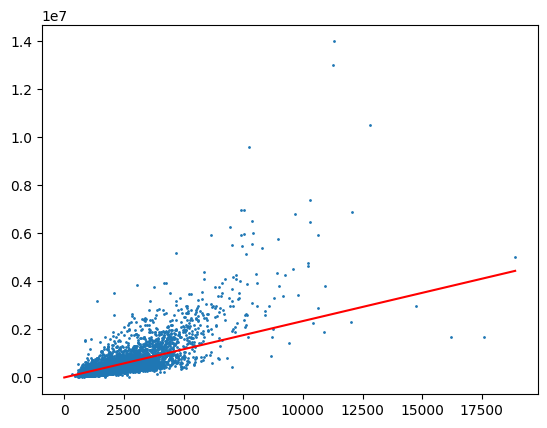

[4/5]: x0 = -0.2440275035940903 x1=235.01435969786698


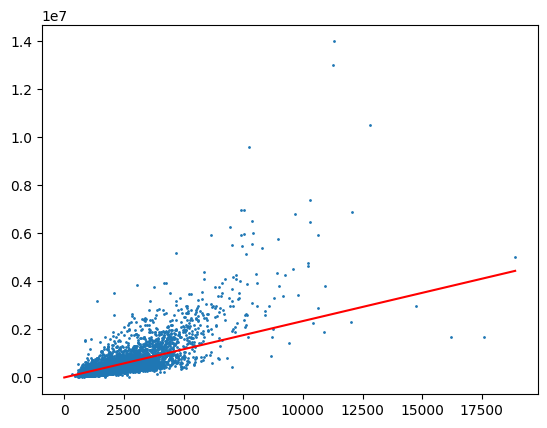

theta_0:  [-0.2440275]
theta_1:  [235.0143597]


In [147]:
placeholder_x = np.arange(np.amax(data[:,x_index]))

def sgd(data, training_rate=0.0000000001, iters=5):
    theta = np.array([[0],[0]])
    X = data[:, [x_index]].astype(int)
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [y_index]].T[0].astype(int)

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, x_index], data[:, y_index], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


theta = sgd(data)
print("theta_0: ", theta[0])
print("theta_1: ", theta[1])


In [150]:
X = data[:, x_index]
Y = data[:, y_index]

i = 0
errors = []
for x, y in zip(X,Y):
    y_pred = theta[0] + theta[1] * x
    error = y - y_pred
    errors.append((error[0], i, stringData[i][0]))
    i += 1

errors.sort()

for listing in errors:
    print(listing[1], '\t', listing[0], '\t', listing[2])


4475 	 -2431082.170741602 	 9231 Fordshire Dr
7507 	 -2107232.3830779414 	 11201 Lynbrook Dr
1214 	 -1207850.9918424587 	 8424 Montridge Dr
4476 	 -1135694.1396754202 	 1302 Hughes St
13 	 -858028.8435380631 	 Junior St
4204 	 -804430.7752701365 	 22214 Queenbury Hills Dr
1699 	 -797397.9186331287 	 1340 Fairview Ave
9006 	 -791570.1184920447 	 1823 Ebony Ln
8720 	 -770542.6632176959 	 1544 Early Ln
1224 	 -764790.8651963337 	 5211 Sagecircle St
8872 	 -763835.0243264032 	 16322 Summer Dew Ln
7763 	 -760649.9805453505 	 13614 Country Green Ct
2239 	 -757000.5721181053 	 19223 Ruble Dr
4615 	 -748297.0570512568 	 2528 Hutchins St
3752 	 -746597.7578513098 	 5443 Jackwood St
7605 	 -726422.6860528206 	 5555 Cranbrook Rd
970 	 -710302.0313909897 	 5532 Beverlyhill St
8491 	 -707680.4918441891 	 7950 N Stadium Dr
6018 	 -704725.3051681169 	 6200 W Tidwell Rd
4901 	 -693997.2522027558 	 2200 Willowick Rd
1386 	 -662673.8520134902 	 16526 Battlecreek Dr
3810 	 -662361.3197583398 	 7901 Cambr